In [135]:
#import os
#os.getcwd()
#os.chdir("Documents//")
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [333]:
def display(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

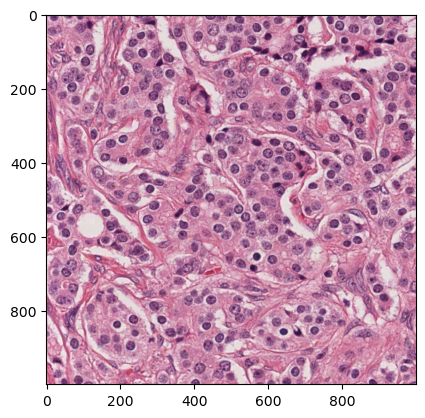

In [334]:
img=cv2.imread("Image_1.tif")
display(img)

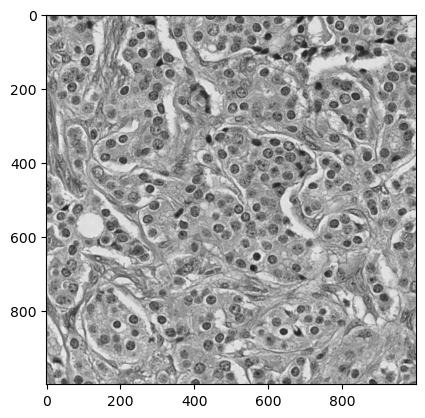

In [335]:
#improve contrast
img1=img[:,:,1]
#plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(gray)

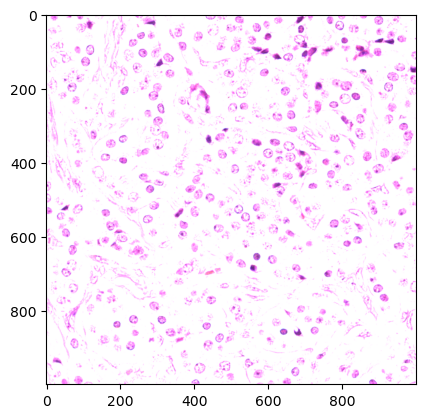

In [336]:
enhanced  = cv2.convertScaleAbs(img, alpha=2.5, beta=0)
display(enhanced)

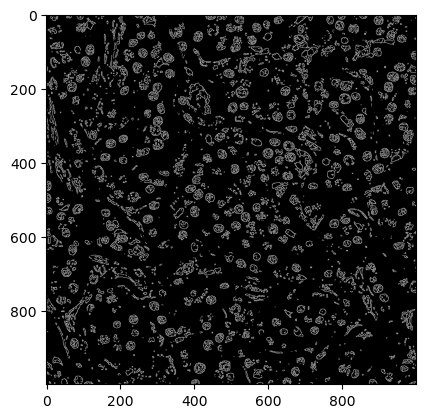

In [337]:
canny=cv2.Canny(enhanced,200,255)
display(canny)

In [338]:
con , hie = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [339]:
img2 = img.copy()
c=0
for cont in con:
    cv2.drawContours(img2 , con  , -1  ,[255,0,0],1)
    c+=1;

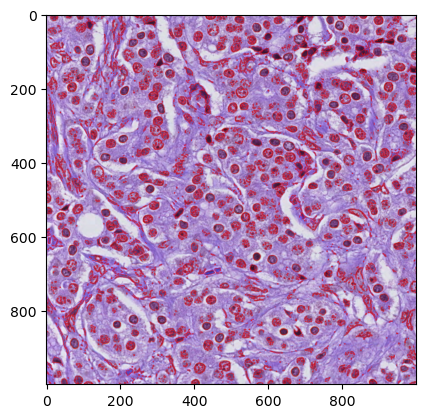

In [340]:
plt.imshow(img2)

In [297]:
r=[]
for contour in con:
    # Calculate the centroid of the contour
    M = cv2.moments(contour)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
    else:
        cX, cY = 0, 0

    # Calculate the radius of the circle to cover the contour region
    radius = int(np.sqrt(cv2.contourArea(contour) / np.pi))*2 +10
    r.append(cv2.contourArea(contour))
    if(cv2.contourArea(contour)>0.5) and (cv2.contourArea(contour)<2.5) :
    # Draw the circle around the contour
        cv2.circle(img, (cX, cY), radius, colors[c%5], 2)
        c+=1


In [ ]:
rset=set(r)
#print(len(rset))
count=[]
for i in rset:
    #print(i,r.count(i))
    count.append(r.count(i))


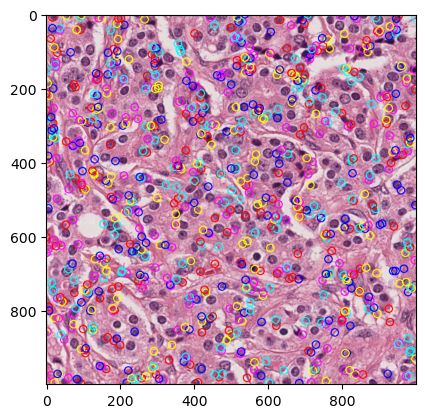

In [298]:
display(img)

Text(0.5, 1.0, 'Output')

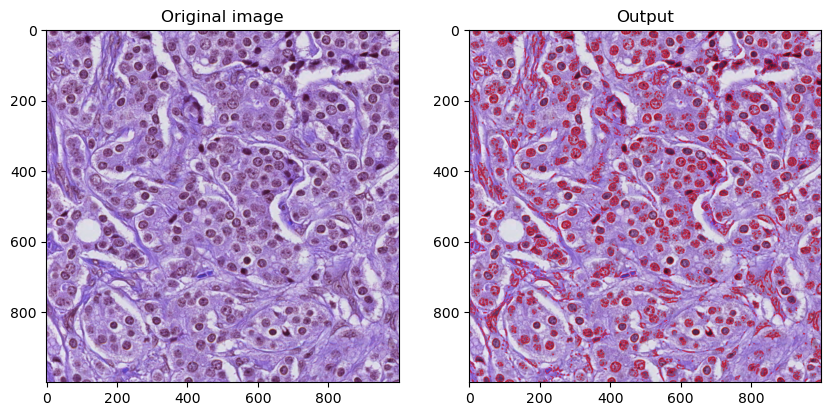

In [341]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,15))
ax1.imshow(img)
ax1.set_title("Original image")
ax2.imshow(img2)
ax2.set_title("Output")


# Method2-Watershed

In [315]:
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

sure_bg = cv2.dilate(opening,kernel,iterations=3)

dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
 

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)


ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
colors = [(255 , 255 , 0) , (255 , 0 , 0) , (0 , 0 , 255) , (0 , 255 , 255) , (255 , 0 , 255)]
img[markers == -1] = [255,0,0]

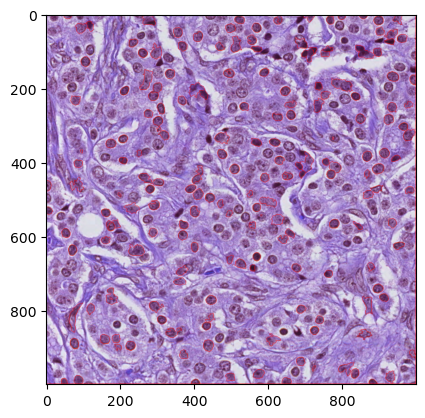

In [316]:
plt.imshow(img)